## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.022984  0.120621 -1.156711  1.570678  0.958013  1.953580
1 -0.971807  1.011445  1.638046 -0.174222 -1.096687 -0.341957
2 -1.664200 -1.659077  0.265846  0.081861 -0.828203 -1.598692
3 -0.973154  1.660982  1.833313 -1.160428  0.404603 -0.128319
4 -1.528019  0.349027 -1.424946 -1.400658 -1.227361 -1.540193


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9914889	total: 57.1ms	remaining: 57.1s
1:	learn: 0.9804276	total: 57.6ms	remaining: 28.8s
2:	learn: 0.9700913	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9606524	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9507260	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9412237	total: 59.7ms	remaining: 9.88s
6:	learn: 0.9303295	total: 60.1ms	remaining: 8.52s
7:	learn: 0.9201532	total: 60.7ms	remaining: 7.52s
8:	learn: 0.9108290	total: 61.2ms	remaining: 6.74s
9:	learn: 0.9021292	total: 61.9ms	remaining: 6.13s
10:	learn: 0.8932934	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8833961	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8748367	total: 63.7ms	remaining: 4.83s
13:	learn: 0.8664527	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8585863	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8507125	total: 65.1ms	remaining: 4s
16:	learn: 0.8434381	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8361293	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8284919	total: 66.6ms	remaining: 3.4

109:	learn: 0.3728337	total: 109ms	remaining: 883ms
110:	learn: 0.3706393	total: 110ms	remaining: 879ms
111:	learn: 0.3673724	total: 110ms	remaining: 875ms
112:	learn: 0.3646519	total: 111ms	remaining: 869ms
113:	learn: 0.3615249	total: 111ms	remaining: 863ms
114:	learn: 0.3584722	total: 111ms	remaining: 858ms
115:	learn: 0.3558493	total: 112ms	remaining: 853ms
116:	learn: 0.3534300	total: 112ms	remaining: 848ms
117:	learn: 0.3509108	total: 113ms	remaining: 844ms
118:	learn: 0.3478640	total: 113ms	remaining: 840ms
119:	learn: 0.3454104	total: 114ms	remaining: 839ms
120:	learn: 0.3429631	total: 115ms	remaining: 836ms
121:	learn: 0.3404185	total: 115ms	remaining: 831ms
122:	learn: 0.3378328	total: 116ms	remaining: 828ms
123:	learn: 0.3353502	total: 117ms	remaining: 824ms
124:	learn: 0.3325331	total: 117ms	remaining: 820ms
125:	learn: 0.3295002	total: 118ms	remaining: 816ms
126:	learn: 0.3269550	total: 118ms	remaining: 811ms
127:	learn: 0.3246472	total: 119ms	remaining: 807ms
128:	learn: 

266:	learn: 0.1247317	total: 187ms	remaining: 514ms
267:	learn: 0.1237831	total: 188ms	remaining: 513ms
268:	learn: 0.1229432	total: 188ms	remaining: 511ms
269:	learn: 0.1221745	total: 189ms	remaining: 510ms
270:	learn: 0.1213900	total: 189ms	remaining: 508ms
271:	learn: 0.1205915	total: 189ms	remaining: 507ms
272:	learn: 0.1198192	total: 190ms	remaining: 505ms
273:	learn: 0.1190789	total: 190ms	remaining: 504ms
274:	learn: 0.1181994	total: 191ms	remaining: 503ms
275:	learn: 0.1174674	total: 191ms	remaining: 502ms
276:	learn: 0.1166568	total: 192ms	remaining: 500ms
277:	learn: 0.1158506	total: 192ms	remaining: 499ms
278:	learn: 0.1151066	total: 192ms	remaining: 497ms
279:	learn: 0.1142781	total: 193ms	remaining: 496ms
280:	learn: 0.1136262	total: 193ms	remaining: 495ms
281:	learn: 0.1128113	total: 194ms	remaining: 494ms
282:	learn: 0.1120158	total: 194ms	remaining: 492ms
283:	learn: 0.1113643	total: 195ms	remaining: 491ms
284:	learn: 0.1105710	total: 195ms	remaining: 490ms
285:	learn: 

491:	learn: 0.0420884	total: 292ms	remaining: 301ms
492:	learn: 0.0419876	total: 292ms	remaining: 301ms
493:	learn: 0.0419279	total: 293ms	remaining: 300ms
494:	learn: 0.0418710	total: 293ms	remaining: 299ms
495:	learn: 0.0416073	total: 294ms	remaining: 298ms
496:	learn: 0.0413995	total: 294ms	remaining: 298ms
497:	learn: 0.0411954	total: 295ms	remaining: 297ms
498:	learn: 0.0409931	total: 295ms	remaining: 296ms
499:	learn: 0.0408579	total: 296ms	remaining: 296ms
500:	learn: 0.0406593	total: 296ms	remaining: 295ms
501:	learn: 0.0405282	total: 297ms	remaining: 294ms
502:	learn: 0.0404726	total: 297ms	remaining: 294ms
503:	learn: 0.0402787	total: 298ms	remaining: 293ms
504:	learn: 0.0400882	total: 298ms	remaining: 292ms
505:	learn: 0.0399011	total: 299ms	remaining: 292ms
506:	learn: 0.0396792	total: 299ms	remaining: 291ms
507:	learn: 0.0393981	total: 300ms	remaining: 290ms
508:	learn: 0.0391903	total: 300ms	remaining: 290ms
509:	learn: 0.0389182	total: 301ms	remaining: 289ms
510:	learn: 

650:	learn: 0.0216009	total: 369ms	remaining: 198ms
651:	learn: 0.0215815	total: 370ms	remaining: 198ms
652:	learn: 0.0215515	total: 371ms	remaining: 197ms
653:	learn: 0.0214298	total: 371ms	remaining: 196ms
654:	learn: 0.0214027	total: 372ms	remaining: 196ms
655:	learn: 0.0213045	total: 372ms	remaining: 195ms
656:	learn: 0.0211841	total: 373ms	remaining: 195ms
657:	learn: 0.0211576	total: 373ms	remaining: 194ms
658:	learn: 0.0210394	total: 374ms	remaining: 193ms
659:	learn: 0.0210132	total: 374ms	remaining: 193ms
660:	learn: 0.0209208	total: 375ms	remaining: 192ms
661:	learn: 0.0208977	total: 375ms	remaining: 191ms
662:	learn: 0.0208277	total: 376ms	remaining: 191ms
663:	learn: 0.0208023	total: 376ms	remaining: 190ms
664:	learn: 0.0206985	total: 377ms	remaining: 190ms
665:	learn: 0.0206303	total: 377ms	remaining: 189ms
666:	learn: 0.0205061	total: 377ms	remaining: 188ms
667:	learn: 0.0204824	total: 378ms	remaining: 188ms
668:	learn: 0.0203811	total: 379ms	remaining: 187ms
669:	learn: 

872:	learn: 0.0093530	total: 476ms	remaining: 69.2ms
873:	learn: 0.0093115	total: 476ms	remaining: 68.7ms
874:	learn: 0.0092755	total: 477ms	remaining: 68.1ms
875:	learn: 0.0092403	total: 477ms	remaining: 67.5ms
876:	learn: 0.0092054	total: 478ms	remaining: 67ms
877:	learn: 0.0091587	total: 478ms	remaining: 66.4ms
878:	learn: 0.0091256	total: 479ms	remaining: 65.9ms
879:	learn: 0.0091051	total: 479ms	remaining: 65.3ms
880:	learn: 0.0090714	total: 479ms	remaining: 64.7ms
881:	learn: 0.0090323	total: 480ms	remaining: 64.2ms
882:	learn: 0.0090026	total: 480ms	remaining: 63.6ms
883:	learn: 0.0089844	total: 481ms	remaining: 63.1ms
884:	learn: 0.0089463	total: 481ms	remaining: 62.5ms
885:	learn: 0.0089077	total: 481ms	remaining: 61.9ms
886:	learn: 0.0088743	total: 482ms	remaining: 61.4ms
887:	learn: 0.0088419	total: 482ms	remaining: 60.8ms
888:	learn: 0.0088059	total: 483ms	remaining: 60.3ms
889:	learn: 0.0087883	total: 483ms	remaining: 59.7ms
890:	learn: 0.0087400	total: 483ms	remaining: 59

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

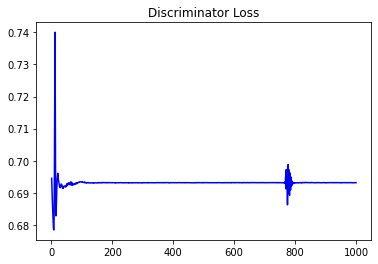

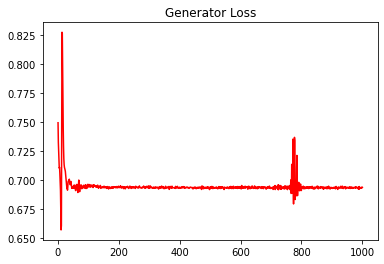

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15589778022991274


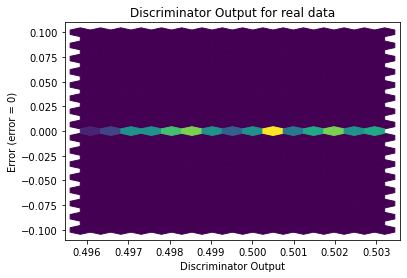

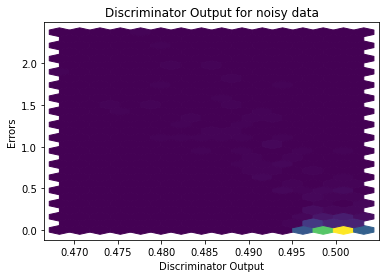

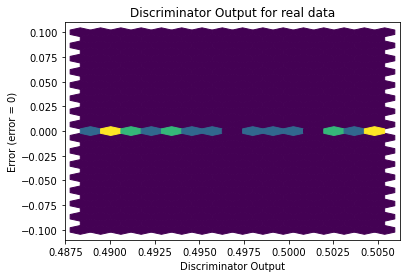

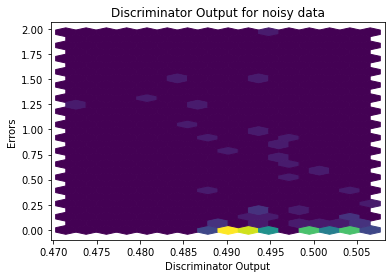

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


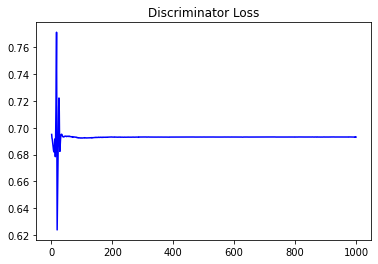

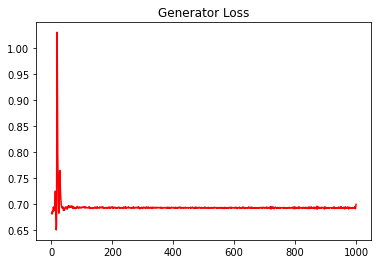

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21834719556052024


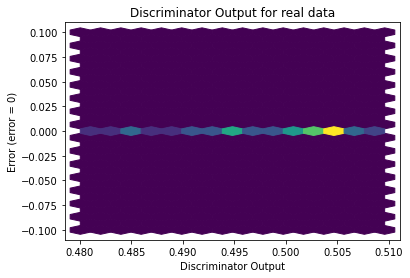

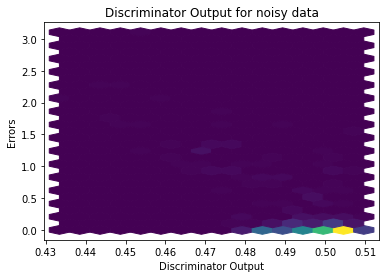

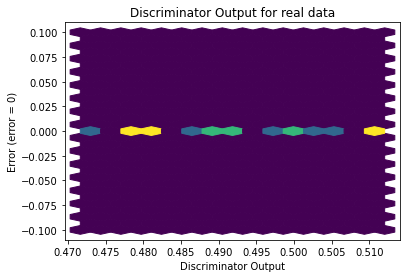

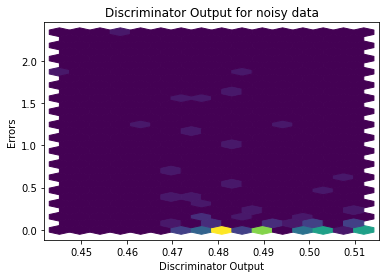

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6985]], requires_grad=True)
